# Advanced Visualization
Materi ke-8 pada Introduction To Python for Data Science

In [1]:
import matplotlib as mpl
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches 

In [2]:
df_can=pd.read_excel('Canada.xlsx', sheet_name='Canada by Citizenship', skiprows=range(20), skipfooter=2)

In [3]:
df_can

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Immigrants,Foreigners,Viet Nam,935,Asia,920,South-Eastern Asia,902,Developing regions,1191,...,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
191,Immigrants,Foreigners,Western Sahara,903,Africa,912,Northern Africa,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
192,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,1,...,124,161,140,122,133,128,211,160,174,217
193,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,11,...,56,91,77,71,64,60,102,69,46,59


In [4]:
# kita bersihkan data terlebih dahulu

In [5]:
# kita menghilankan kolom yang tidak dipakai dalam visualisasi saat ini
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)

#kita rename label kolom 
df_can.rename(columns={'OdName':'Country','AreaName':'Continent','RegName':'Region'},inplace=True)

#kita bikin label menjadi tipe data string
df_can.columns=list(map(str,df_can.columns))

#mengganti index ke country

df_can.set_index('Country', inplace=True)

df_can['Total']= df_can.sum(axis=1)

years=list(map(str, range(1980,2014)))
df_can.shape


C:\Users\ASUS-X~1\AppData\Local\Temp/ipykernel_12212/492725328.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total']= df_can.sum(axis=1)


(195, 38)

In [6]:
df_can.shape

(195, 38)

In [7]:
df_can

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,Asia,South-Eastern Asia,Developing regions,1191,1829,2162,3404,7583,5907,2741,...,1852,3153,2574,1784,2171,1942,1723,1731,2112,97146
Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
Yemen,Asia,Western Asia,Developing regions,1,2,1,6,0,18,7,...,161,140,122,133,128,211,160,174,217,2985


In [8]:
#studi kasus tentang Denmark Norway, dan Sweden

In [9]:
df_dsn=df_can.loc[['Denmark', 'Norway', 'Sweden'], :]
df_dsn

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866


## Waffle Charts

In [10]:
#step 1 mementukan proporsi setiap kategori sehubungan dengan totalnya

total_values=sum(df_dsn['Total'])
category_proportions=[(float(value)/total_values) for value in df_dsn['Total']]

for i, proportion in enumerate(category_proportions):
    print(df_dsn.index.values[i]+':'+str(proportion))

Denmark:0.32255663965602777
Norway:0.1924094592359848
Sweden:0.48503390110798744


In [11]:
# step 2 menentukan ukuran waffle chart

width=40
height=10

total_num_tiles=width*height

In [12]:
#step 3  menggunakan proporsi tiap kategori untuk menentukan jumlah ubin masing masing kategori

tiles_per_category=[round(propotion*total_num_tiles) for propotion in category_proportions]

for i, tiles in enumerate(tiles_per_category) :
    print(df_dsn.index.values[i]+':'+str(tiles))

Denmark:129
Norway:77
Sweden:194


In [13]:
#step 4 membuat matriks  waffle

waffle_chart = np.zeros((height,width))

category_index=0
tile_index=0

for col in range(width):
    for row in range (height):
        tile_index+=1
        
        if tile_index > sum(tiles_per_category[0:category_index]):
            category_index+=1
        waffle_chart[row,col]=category_index
print('Waffle Chart populated')

Waffle Chart populated


In [14]:
waffle_chart

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
   

<Figure size 432x288 with 0 Axes>

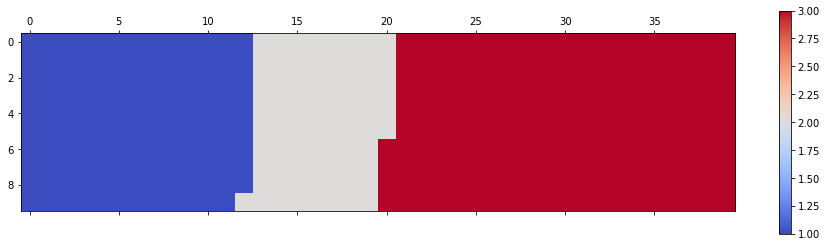

In [15]:
# step 5 memetakan matriks waffle chart
fig=plt.figure()
colormap=plt.cm.coolwarm
plt.matshow(waffle_chart,cmap=colormap)
plt.colorbar()

([], [])

<Figure size 432x288 with 0 Axes>

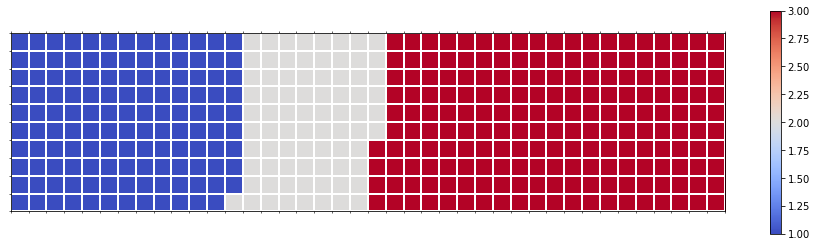

In [16]:
# kita percantik chart

fig=plt.figure()
colormap=plt.cm.coolwarm
plt.matshow(waffle_chart,cmap=colormap)
plt.colorbar()

ax=plt.gca()

ax.set_xticks(np.arange(-.5,(width),1),minor=True)
ax.set_yticks(np.arange(-.5,(height),1),minor=True)
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

<Figure size 432x288 with 0 Axes>

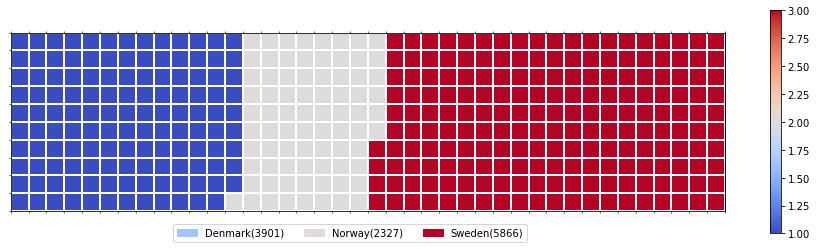

In [17]:

fig=plt.figure()
colormap=plt.cm.coolwarm
plt.matshow(waffle_chart,cmap=colormap)
plt.colorbar()

ax=plt.gca()

ax.set_xticks(np.arange(-.5,(width),1),minor=True)
ax.set_yticks(np.arange(-.5,(height),1),minor=True)
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

#kita menambahkan legend

# menghitung kumulatif dari kategori  warna secara individu untuk menyamakan color schemes chart dan legend

values_cumsum=np.cumsum(df_dsn['Total'])
total_values=values_cumsum[len(values_cumsum)-1]

#create legend
legend_handles=[]
for i, category in enumerate(df_dsn.index.values):
    label_str=category+'(' + str(df_dsn['Total'][i])+')'
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))   
    
   
                                 
                                 
plt.legend(handles=legend_handles,
            loc='lower center',
            ncol=len(df_dsn.index.values),
            bbox_to_anchor=(0., -0.2, 0.95, .1)  )

In [18]:
def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):

    # compute the proportion of each category with respect to the total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    # compute the total number of tiles
    total_num_tiles = width * height # total number of tiles
    print ('Total number of tiles is', total_num_tiles)
    
    # compute the number of tiles for each catagory
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

    # print out number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print (df_dsn.index.values[i] + ': ' + str(tiles))
    
    # initialize the waffle chart as an empty matrix
    waffle_chart = np.zeros((height, width))

    # define indices to loop through waffle chart
    category_index = 0
    tile_index = 0

    # populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1

            # if the number of tiles populated for the current category 
            # is equal to its corresponding allocated tiles...
            if tile_index > sum(tiles_per_category[0:category_index]):
                # ...proceed to the next category
                category_index += 1       
            
            # set the class value to an integer, which increases with class
            waffle_chart[row, col] = category_index
    
    # instantiate a new figure object
    fig = plt.figure()

    # use matshow to display the waffle chart
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    # get the axis
    ax = plt.gca()

    # set minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
    # add dridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    # compute cumulative sum of individual categories to match color schemes between chart and legend
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]

    # create legend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'
            
        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    # add legend to chart
    plt.legend(
        handles=legend_handles,
        loc='lower center', 
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )

Total number of tiles is 1000
Denmark: 323
Norway: 192
Sweden: 485


<Figure size 432x288 with 0 Axes>

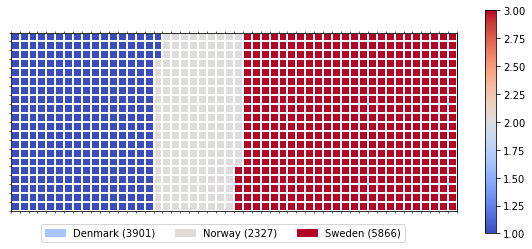

In [19]:
width = 50
height = 20 

categories = df_dsn.index.values 
values = df_dsn['Total'] 

colormap = plt.cm.coolwarm 
create_waffle_chart(categories, values, height, width, colormap)

## Word Clouds

Word clouds adalah tampilan dari kumpulan kata kata yang sering muncul yang divisualisasi dalam gambar yang bervariasi. Secara default akan ditampilkan dalam bentuk persegi.

In [20]:
from wordcloud import WordCloud, STOPWORDS

In [21]:
alice_novel = open('novel_alice.txt', 'r').read()

In [22]:
stopwords = set(STOPWORDS)

In [23]:
# instantiate a word cloud object
alice_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
alice_wc.generate(alice_novel)

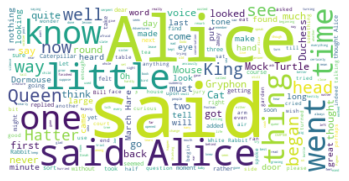

In [24]:
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

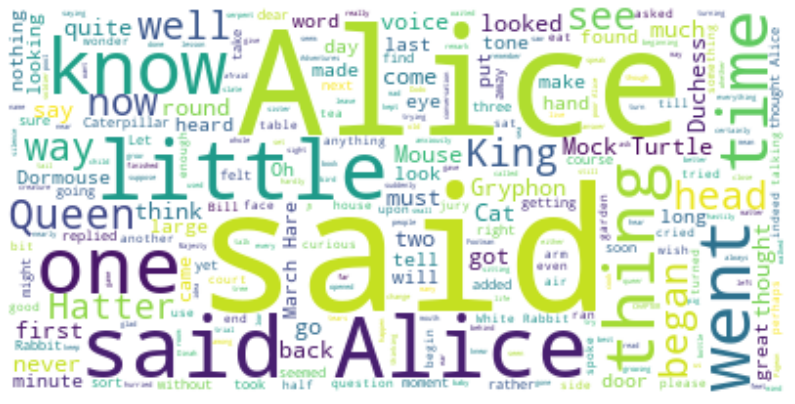

In [25]:
fig = plt.figure()
fig.set_figwidth(14) 
fig.set_figheight(18) 


plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()


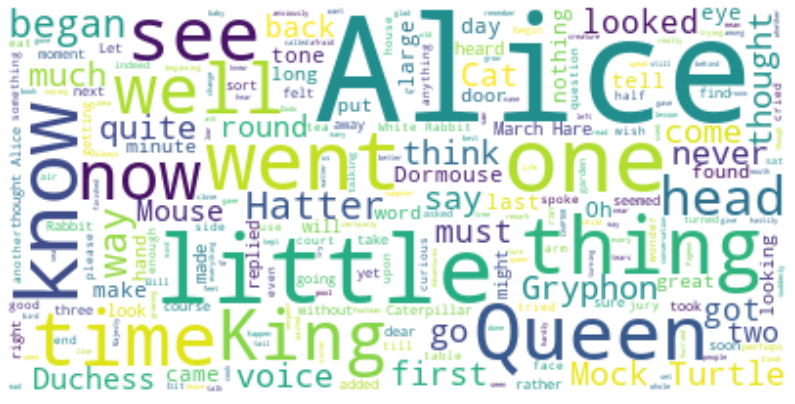

In [26]:
stopwords.add('said') # menambahkan kata yang tidak dipakai

# re-generate the word cloud
alice_wc.generate(alice_novel)

# display the cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [27]:
alice_mask = np.array(Image.open('alice_mask.png'))

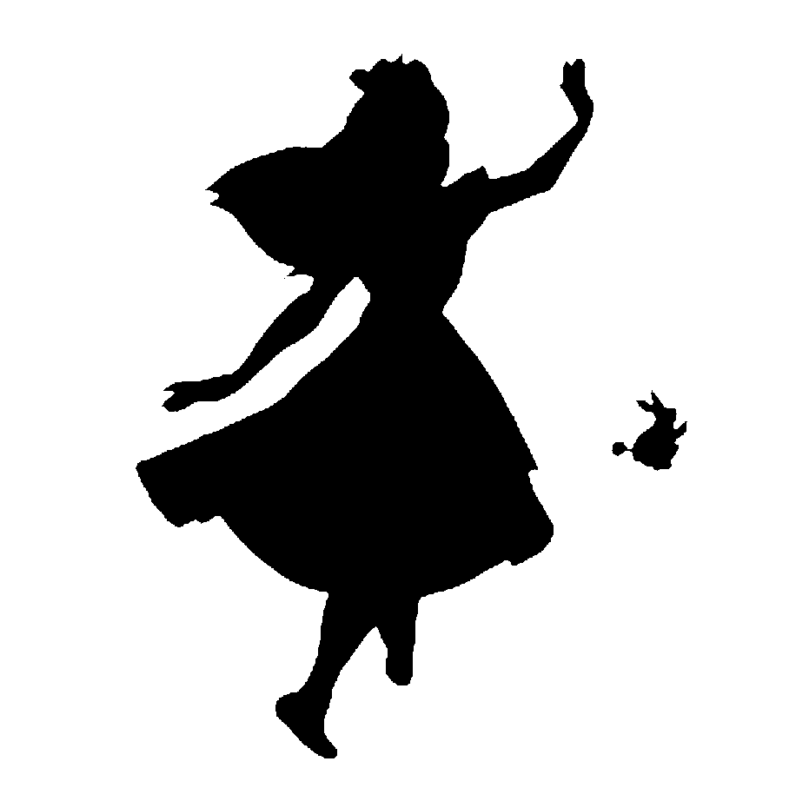

In [28]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

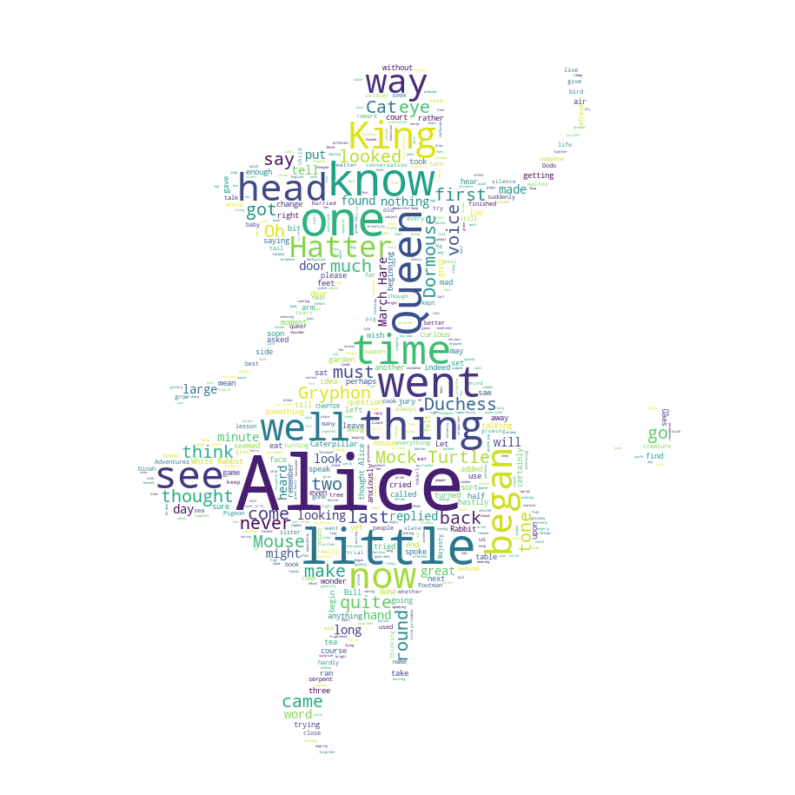

In [29]:
alice_wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask, stopwords=stopwords)

# generate the word cloud
alice_wc.generate(alice_novel)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [30]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [31]:
total_immigration = df_can['Total'].sum()
total_immigration

6409153

In [32]:
max_words = 90
word_string = ''
for country in df_can.index.values:
    # check if country's name is a single-word name
    if len(country.split(' ')) == 1:
        repeat_num_times = int(df_can.loc[country, 'Total']/float(total_immigration)*max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)
                                     
# display the generated text
word_string

# create the word cloud
wordcloud = WordCloud(background_color='white').generate(word_string)

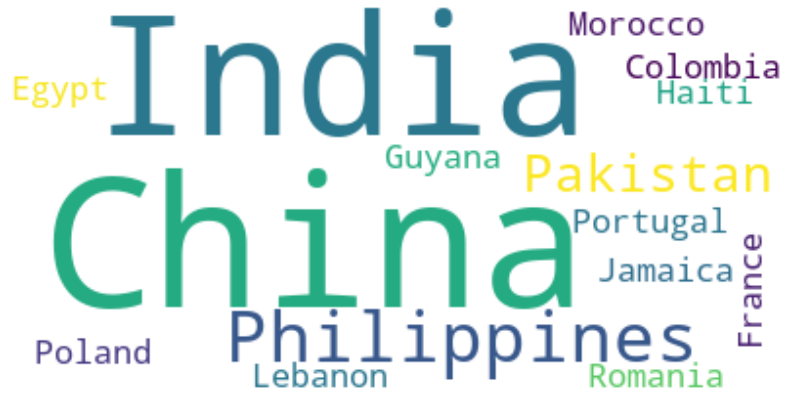

In [33]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Reggression Plots

In [34]:
import seaborn as sns

In [35]:
df_tot=pd.DataFrame(df_can[years].sum(axis=0) )
df_tot.index=map(float,df_tot.index)
df_tot.reset_index(inplace=True)
df_tot.columns=['year', 'total']
df_tot.head()

,year,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


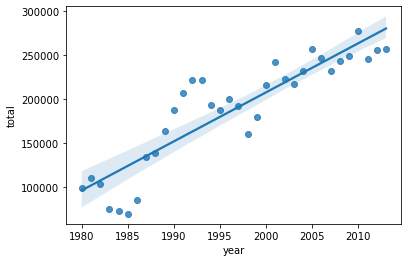

In [36]:
ax = sns.regplot(x='year', y='total', data=df_tot)

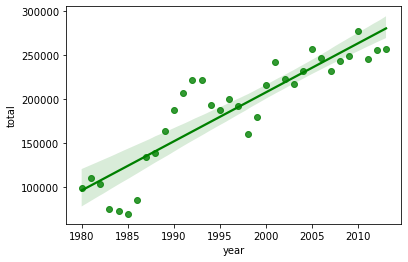

In [37]:
ax = sns.regplot(x='year', y='total', data=df_tot, color='green')


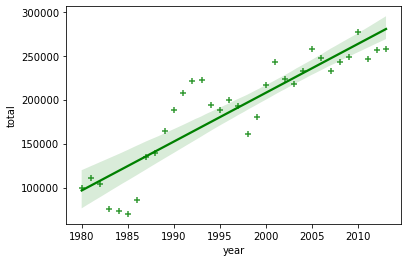

In [38]:
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')

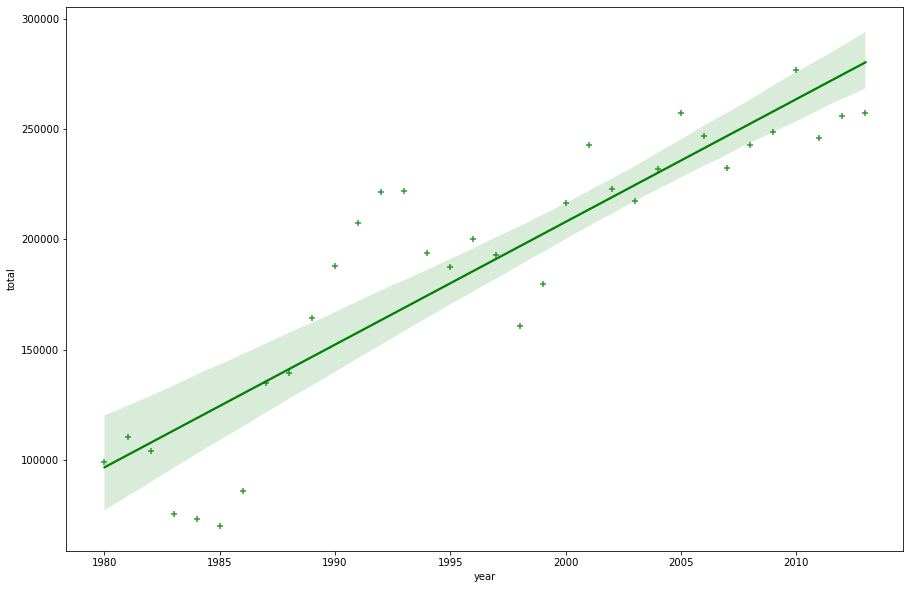

In [39]:
plt.figure(figsize=(15, 10))
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

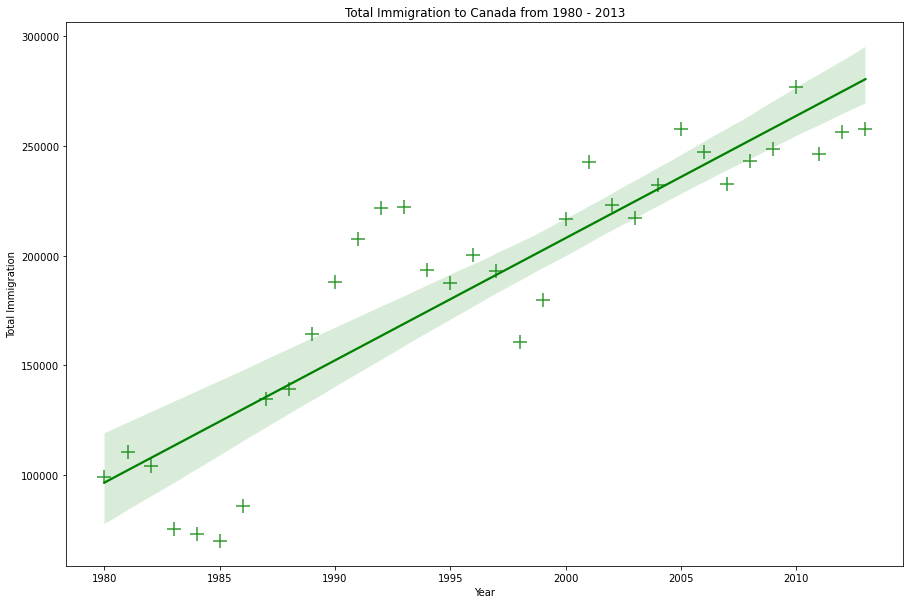

In [40]:
plt.figure(figsize=(15, 10))
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})

ax.set(xlabel='Year', ylabel='Total Immigration') # add x- and y-labels
ax.set_title('Total Immigration to Canada from 1980 - 2013') # add title

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

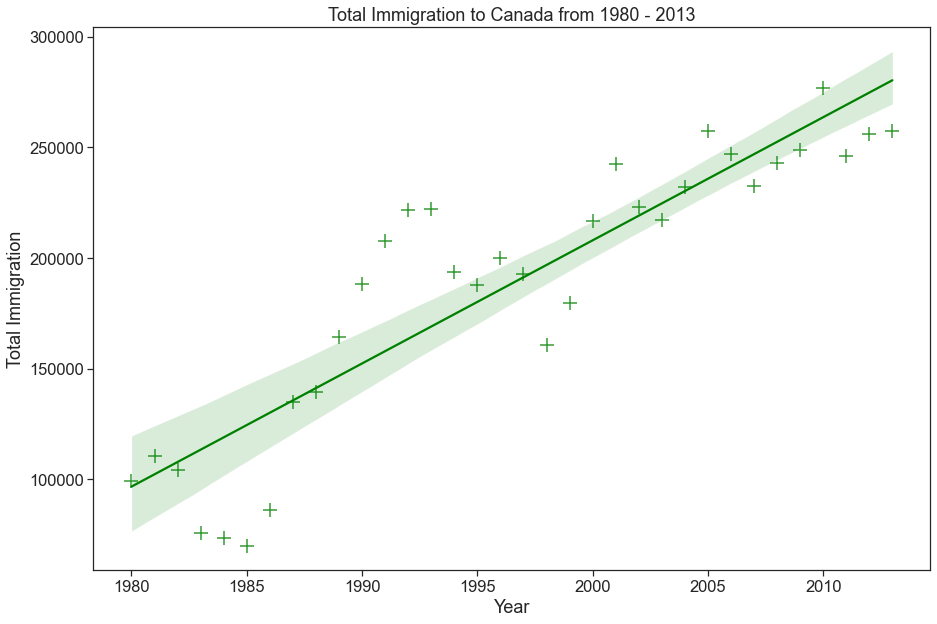

In [41]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('ticks') # change background to white background

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

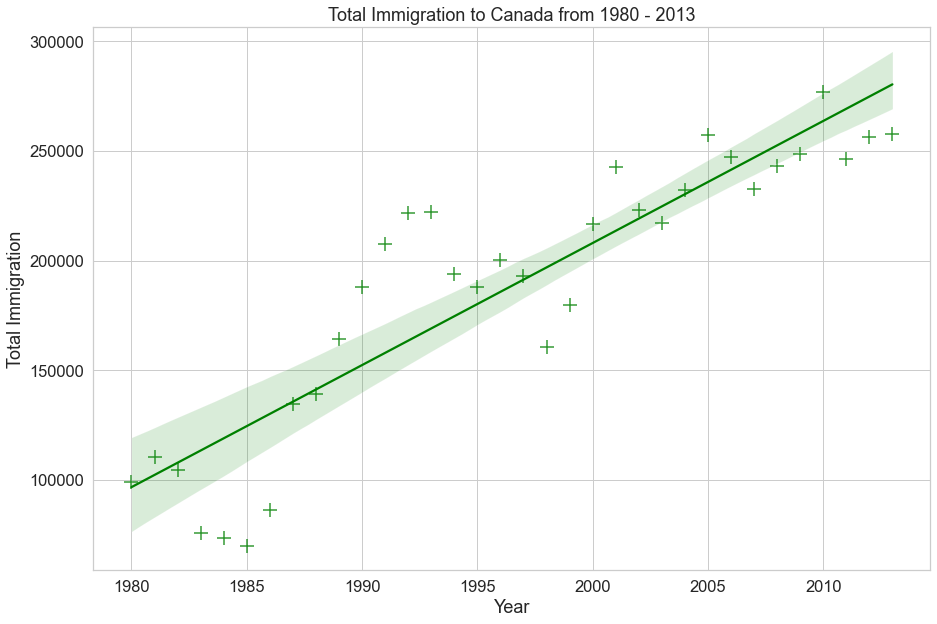

In [42]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('whitegrid')

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')

Use seaborn to create a scatter plot with a regression line to visualize the total immigration from Denmark, Sweden, and Norway to Canada from 1980 to 2013.

Text(0.5, 1.0, 'Total Immigrationn from Denmark, Sweden, and Norway to Canada from 1980 - 2013')

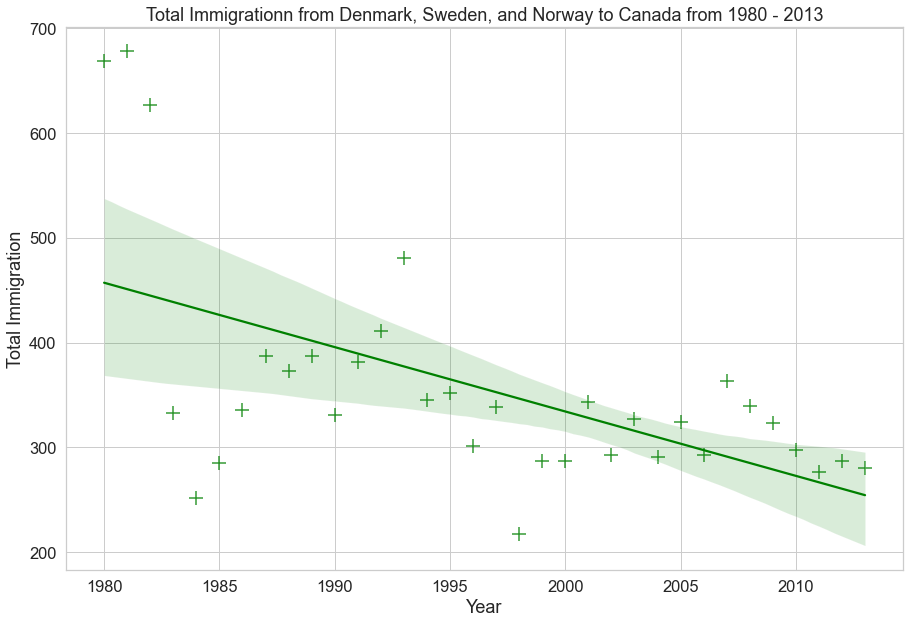

In [43]:
# create df_countries dataframe
df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
# create df_total by summing across three countries for each year
df_total = pd.DataFrame(df_countries.sum(axis=1))
# reset index in place
df_total.reset_index(inplace=True)
# rename columns
df_total.columns = ['year', 'total']
# change column year from string to int to create scatter plot
df_total['year'] = df_total['year'].astype(int)
# define figure size
plt.figure(figsize=(15, 10))
# define background style and font size
sns.set(font_scale=1.5)
sns.set_style('whitegrid')
# generate plot and add title and axes labels
ax = sns.regplot(x='year', y='total', data=df_total, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigrationn from Denmark, Sweden, and Norway to Canada from 1980 - 2013')

## Introduction to Folium 

#

In [44]:
import folium

In [47]:
world_map=folium.Map()
world_map

In [51]:
world_map = folium.Map(location=[-8.219021, 114.369102], zoom_start=9)
world_map

In [53]:
world_map = folium.Map(location=[-6.2607187, 106.7794275], zoom_start=15)
world_map

### Stamen Toner Maps
peta bewarna hitam putih dengan kontras tinggi

In [54]:
world_map = folium.Map(location=[-6.9902851, 110.4207485], zoom_start=13, tiles='Stamen Toner')

world_map

### Stamen Terrain Maps
Peta dengan banyangan bukit dan warna vegetasi alaminya

In [56]:
world_map = folium.Map(location=[-8.219021, 114.369102], zoom_start=15, tiles='Stamen Terrain')

# display map
world_map

### Maps dengan Marker

In [57]:
download_url='https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/Police_Department_Incidents_-_Previous_Year__2016_.csv'

In [59]:
import requests
response=requests.get(download_url)
with open('crime_data.csv','wb') as f:
    f.write(response.content)

In [60]:
df_incidents= pd.read_csv('crime_data.csv')
df_incidents.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


- IncidntNum: Incident Number
- Category: Category of crime or incident
- Descript: Description of the crime or incident
- DayOfWeek: The day of week on which the incident occurred
- Date: The Date on which the incident occurred
- Time: The time of day on which the incident occurred
- PdDistrict: The police department district
- Resolution: The resolution of the crime in terms whether the perpetrator was arrested or not
- Address: The closest address to where the incident took place
- X: The longitude value of the crime location
- Y: The latitude value of the crime location
- Location: A tuple of the latitude and the longitude values
- PdId: The police department ID

In [61]:
df_incidents.shape

(150500, 13)

In [63]:
limit = 200
df_incidents = df_incidents.iloc[0:limit, :]
df_incidents.shape

(200, 13)

In [68]:
# map of san francisco
latitude = 37.77
longitude = -122.42

sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=11)
sanfran_map

In [70]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 200 crimes and add each to the incidents feature group
for lat, lng, in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
sanfran_map.add_child(incidents)

In [71]:
# Menambahkan keterangan kriminal dengan pop up pada titik kriminal
incidents = folium.map.FeatureGroup()

# loop through the 200 crimes and add each to the incidents feature group
for lat, lng, in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add pop-up text to each marker on the map
latitudes = list(df_incidents.Y)
longitudes = list(df_incidents.X)
labels = list(df_incidents.Category)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(sanfran_map)    
    
# add incidents to map
sanfran_map.add_child(incidents)

In [72]:

sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# loop through the 100 crimes and add each to the map
for lat, lng, label in zip(df_incidents.Y, df_incidents.X, df_incidents.Category):
    folium.CircleMarker(
        [lat, lng],
        radius=5, # define how big you want the circle markers to be
        color='yellow',
        fill=True,
        popup=label,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(sanfran_map)

# show map
sanfran_map

In [73]:
from folium import plugins

sanfran_map = folium.Map(location = [latitude, longitude], zoom_start = 12)


incidents = plugins.MarkerCluster().add_to(sanfran_map)


for lat, lng, label, in zip(df_incidents.Y, df_incidents.X, df_incidents.Category):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)


sanfran_map

### Choropleth Maps

In [75]:
df_can.shape

(195, 38)

In [85]:

df_can.reset_index(inplace=True)
df_can.head(3)

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439


In [80]:
download_url='https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/world_countries.json'
response=requests.get(download_url)
with open('world_countries.json','wb') as f:
    f.write(response.content)

In [86]:
world_geo = r'world_countries.json'
world_map = folium.Map(location=[0, 0], zoom_start=2, tiles='Openstreet map')

# generate choropleth map using the total immigration of each country to Canada from 1980 to 2013
world_map.choropleth(
    geo_data=world_geo,
    data=df_can,
    columns=['Country', 'Total'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Immigration to Canada'
)

# display map
world_map

C:\ProgramData\Anaconda3\lib\site-packages\folium\folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(
